In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

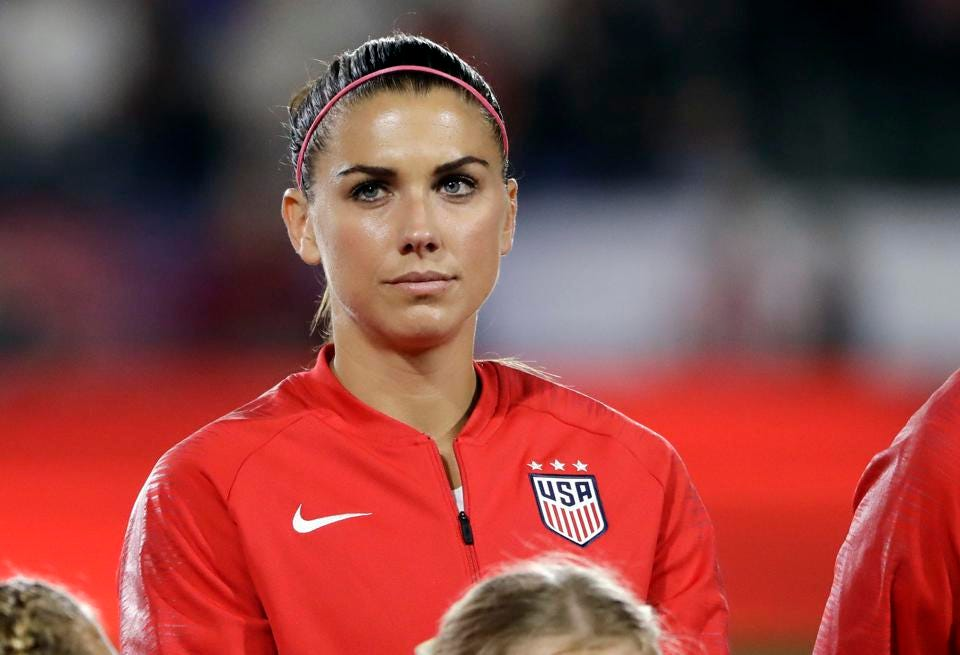

In [ ]:
img=cv2.imread("/content/alexmorgan.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

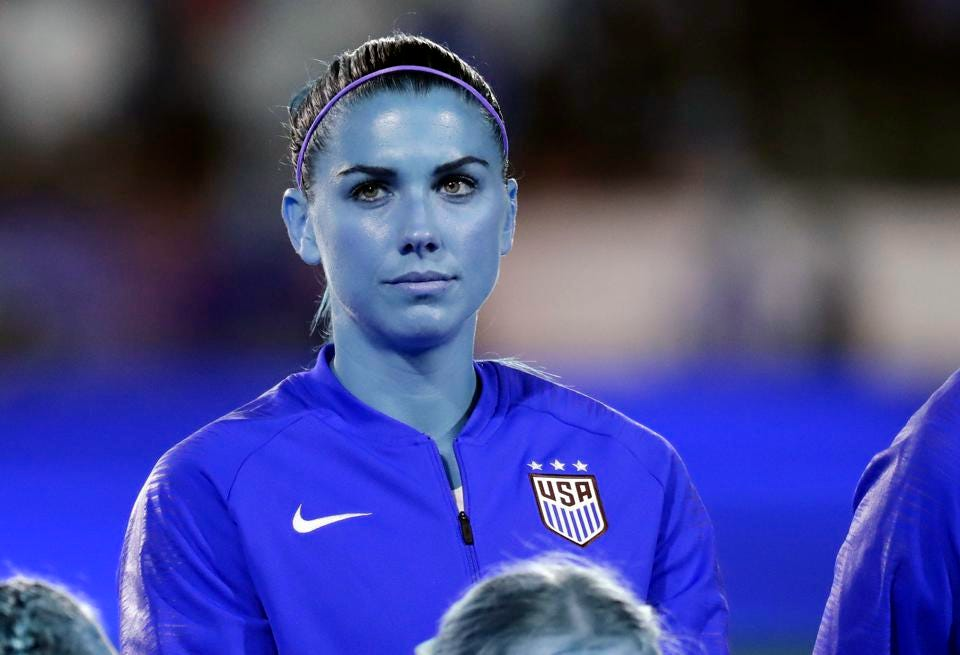

In [ ]:
imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(imgRGB)

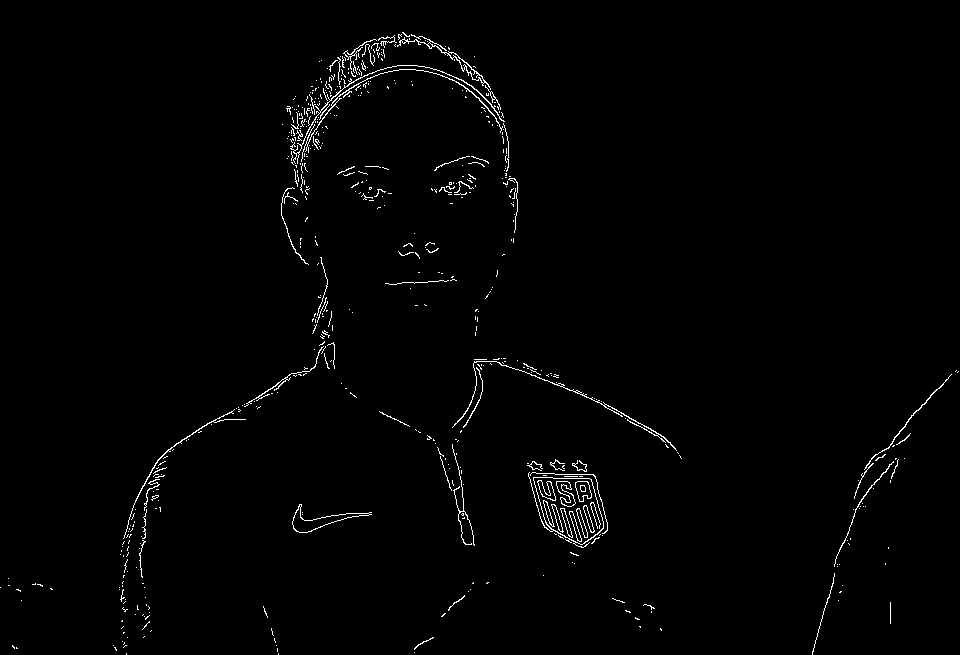

In [ ]:
edges = cv2.Canny(imgRGB, 300, 300)
cv2_imshow(edges)

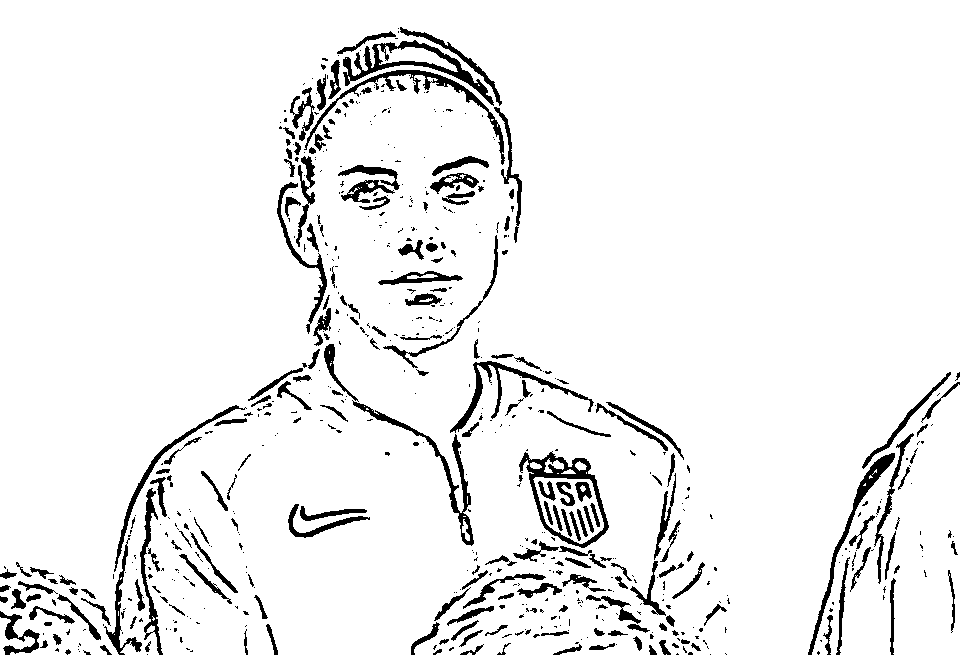

In [ ]:
gray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
gray1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
cv2_imshow(edges)

In [ ]:
#color quantization

def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

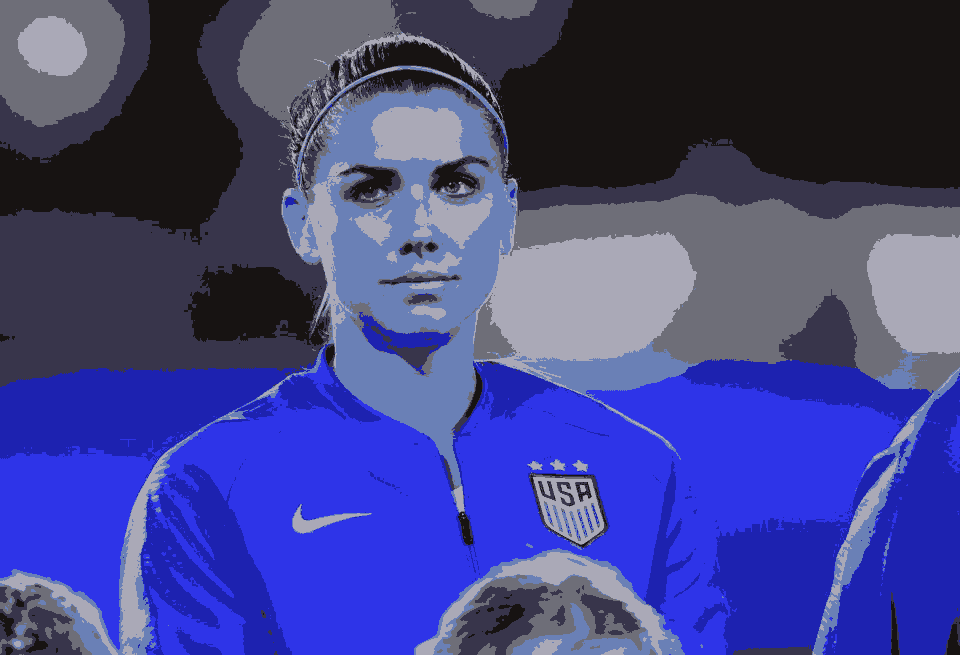

In [ ]:
img_1 = color_quantization(imgRGB, 7)
cv2_imshow(img_1)

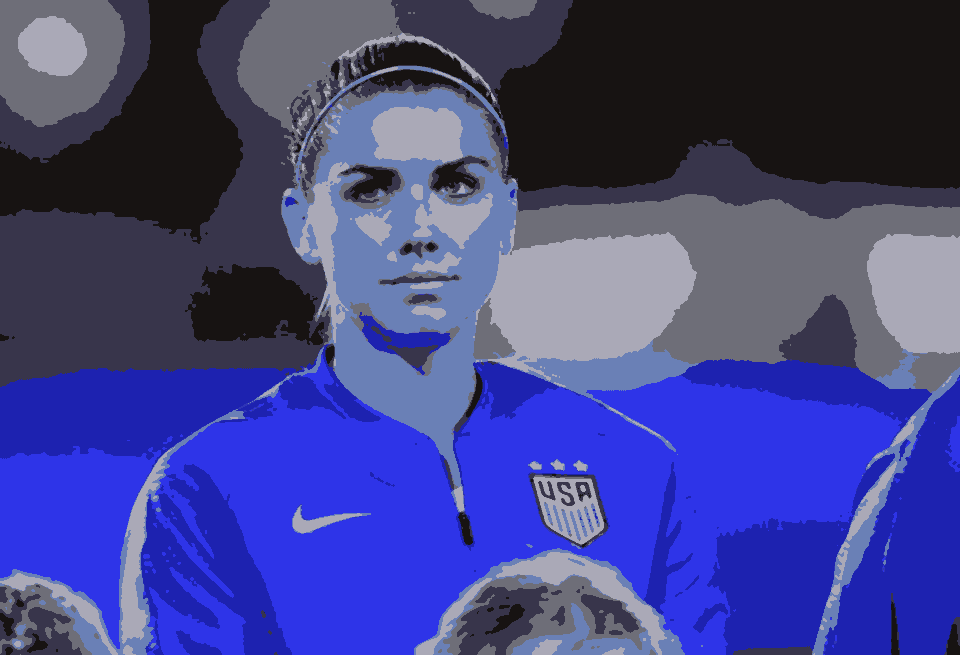

In [ ]:
blurred = cv2.medianBlur(img_1, 3)
cv2_imshow(blurred)

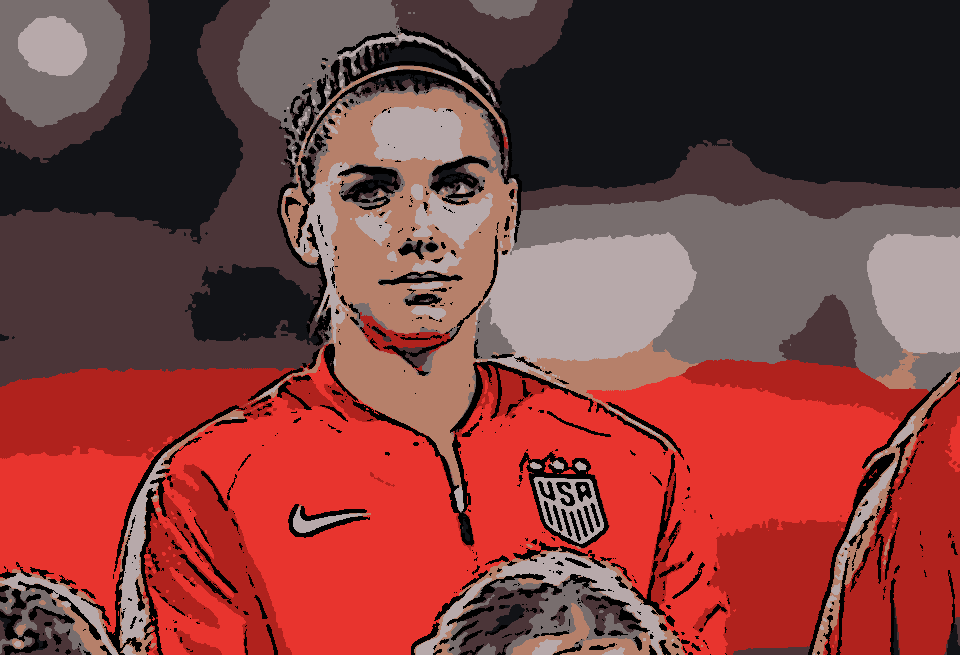

In [ ]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cartoon = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2_imshow(cartoon)